# **Ex1 - Unsupervised learning**

## Names and IDs

1.   Victor Gavrilenko 209406255
2.   Ilay Cohen 206515744

**Introduction**

In this assignment, we will focus on the practical application of unsupervised learning methods, specifically K-means clustering and Principal Component Analysis (PCA). The primary objective is to deepen your understanding of these algorithms and develop proficiency in their implementation using Python and relevant libraries.

**Learning Objectives:**
1.   **Load Local Files**: Implement techniques for
     loading datasets from a local file system into Python.
3.   **Data Visualization**: Apply various visualization techniques to interpret and present your data analysis findings effectively.
4.   **Use Scikit-learn for K-means Clustering**: Use the Scikit-learn library to apply the K-means clustering algorithm.
5.   **Implement Scikit-learn PCA**: Utilize PCA from Scikit-learn to perform dimensionality reduction, a critical technique for analyzing high-dimensional data.
6.   **Algoritmic Understendig**: Solve the calculation problem whle using the algorithms learned in class.








**Important Guidelines:**

**Thoroughly Read the Task Before Implementation:** Ensure to understand the entire assignment and its requirements before beginning to code. A comprehensive understanding will aid in a more structured and efficient approach to the tasks.

**Code Reusability and Function Writing:** Focus on writing reusable code and functions. This practice is crucial for maintaining an organized, efficient, and easily debuggable codebase.





















This assignment is designed to enhance both your theoretical understanding and practical skills in key areas of machine learning. Approach each task with diligence and attention to detail.

## Import All Packages
Add all imports needed for this notebook to run

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
#import os

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

# Helper function for clean and nice printing format
def PRINT(text)-> None: print(f"{80*'~'}\n{text}\n{80*'~'}")

## Helper Functions

In [ ]:
def elbow_method_for_best_K_and_visualize(df) -> None:
    """
    Takes data frame and preforme elbow method over 10 K-means iteration in order to find the best K

    Params :
    df - pandas data frame
    """
    inertia_values = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
        kmeans.fit_predict(df)
        inertia_values.append(kmeans.inertia_)

    # Plot the Elbow Method
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), inertia_values, marker='o', color='green')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.show()

In [ ]:
def silhouette_score_method_for_best_K_and_visualize(df) -> None:
    """
    Takes data frame and preforme silhouette method over 10 K-means iteration in order to find the best K

    Params :
    df - pandas data frame
    """
    silhouette_scores = []
    for n_clusters in range(2, 9):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, init='k-means++')
        labels = kmeans.fit_predict(df)
        silhouette_scores.append(silhouette_score(df, labels))

    # Plot the silhouette scores
    plt.figure(figsize=(8, 6))
    plt.plot(range(2, 9), silhouette_scores, marker='o')
    plt.title('Silhouette Score for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.show()

In [ ]:
def apply_kmeans_algorithm_and_visualize_PCA(df, n_clusters) -> None:
    """
    Helper function for exercise 4.
    Takes df (in our case data frame after executing PCA dimension reduction mathod on it) and number of clusters,
    executed K-means algorithm and plots the clusters for visualization

    params:
    df - pandas data frame
    c_clusters - int, number of clusters
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto',init='k-means++',max_iter=300,
                        tol=0.0001, algorithm='elkan')
    df['Cluster'] = kmeans.fit_predict(df)


    # Visualize the clusters
    plt.figure(figsize=(10, 6))

    for cluster in range(n_clusters):
        cluster_data = df[df['Cluster'] == cluster]
        plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster + 1}')

    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='X', color='red', label='Centroids')
    plt.title(f'k-Means Clustering of PCA1 vs. PCA2 with k={n_clusters}')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.legend()
    plt.show()

## 1. Visualization (15 points)
In this section, your task is to create and analyze **three** insightful visualizations based on the customer segmentation dataset. The purpose of these visualizations is to uncover underlying patterns and trends in the data that can inform strategic decisions. Your ability to interpret these visualizations will be key in understanding customer behaviors and preferences.

*   You will get 4 points for the graph and 1 for the insight.



In [ ]:
cs_df = pd.read_csv('customer_segmentation.csv')
cs_df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [ ]:
PRINT(f'Dataframe shape: (samples, columns) {cs_df.shape}')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Dataframe shape: (samples, columns) (2240, 29)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The number of rows we filtered from our data frame that got Income > 140000 is 8
while the total number of rows before dropping is 2240
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


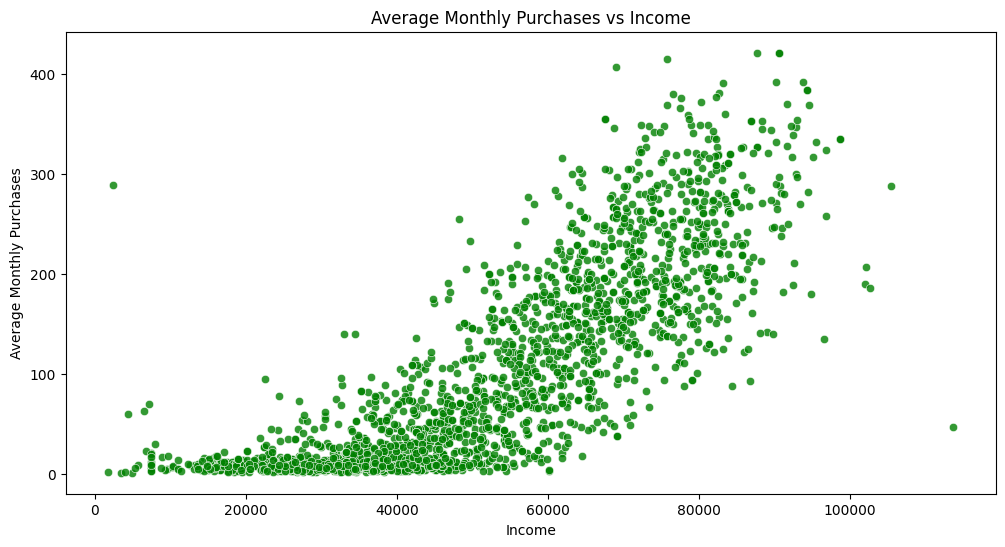

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Correlation between income and average monthly purchases: 0.824
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [ ]:
# Graph 1 -
cs_df_v01 = cs_df.copy()

# Feature engineering - We create new feature to measure customer average monthly purchases of wines, fruits, meatm fish, sweets and gold
cs_df_v01['Average Monthly Purchases'] = cs_df_v01[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean(axis=1)

total_number_of_rows = cs_df_v01.shape[0]

# We filter the small amount row rows where the income is greater than 140000 for better visualization of our data
number_of_filtered_income_rows = cs_df_v01[cs_df_v01['Income'] > 140000].shape[0]
PRINT(f'The number of rows we filtered from our data frame that got Income > 140000 is {number_of_filtered_income_rows}\nwhile the total number of rows before dropping is {total_number_of_rows}')

cs_df_v01 = cs_df_v01[cs_df_v01['Income'] <= 140000]

plt.figure(figsize = (12, 6))
sns.scatterplot(cs_df_v01, x = 'Income', y = 'Average Monthly Purchases', color='green',alpha=0.8)
plt.title("Average Monthly Purchases vs Income")
plt.grid(False)
plt.show()
PRINT(f"\nCorrelation between income and average monthly purchases: {cs_df_v01['Income'].corr(cs_df_v01['Average Monthly Purchases']):.3f}")

**Insight** - When examining the correlation between `Income` and `Average Monthly Purchases` through the initial scatterplot, we noticed a few data points significantly above the threshold of `Income > 140,000`. These outliers notably impacted the correlation, yielding a value of approximately *0.68*. Consequently, we chose to exclude these 8 rows from the original dataset, which consisted of 2240 rows.

The key finding suggests a clear link between an individual's income and their average monthly purchases. Higher incomes seem to correspond to increased monthly spending, indicating a positive association between income levels and purchasing behavior.

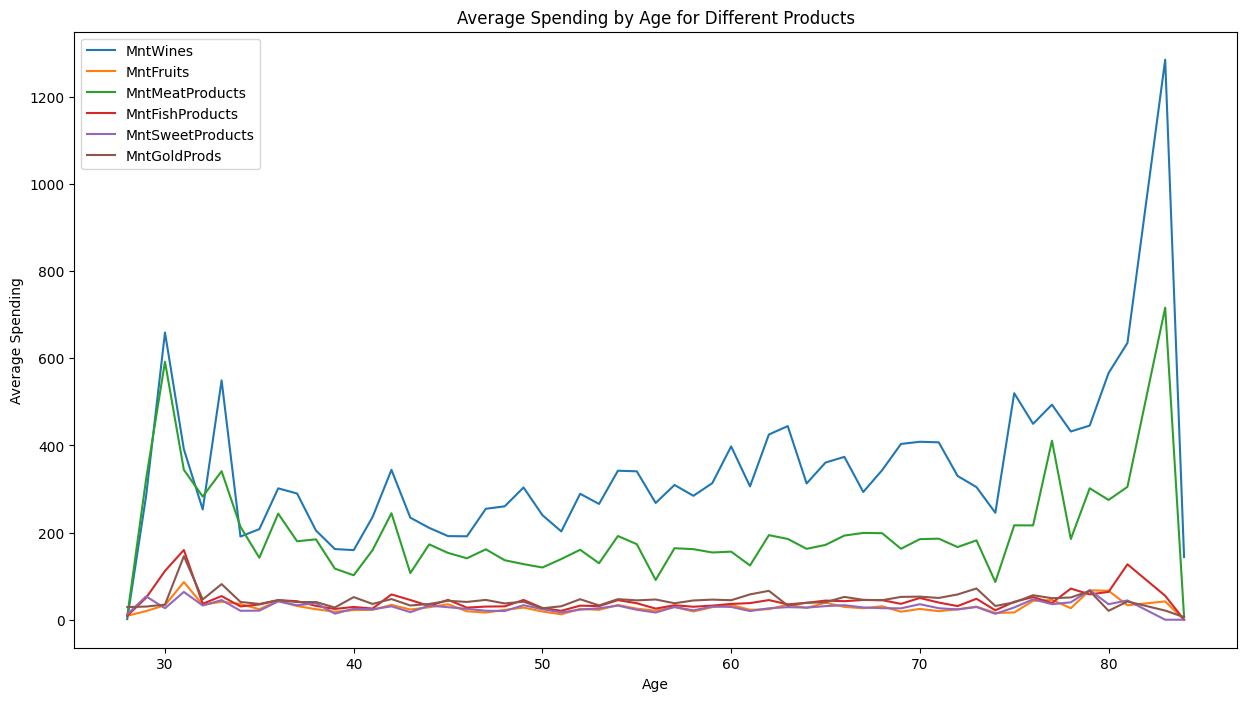

In [ ]:
# Graph 2 -
cs_df_v02 = cs_df.copy()

# Feature engineering - we generate new feature called Age, to measure customer current age (according to 2024 year)
cs_df_v02['Age'] = 2024 - cs_df_v02['Year_Birth']

# Filter the customer with age greater than 110, for better data visualization & group each age by the average consumption of wine, fruits etc..
cs_df_v02 = cs_df_v02[cs_df_v02['Age'] <= 110]
group_means = cs_df_v02.groupby('Age')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

plt.figure(figsize=(15, 8))

for column in group_means.columns:
    plt.plot(group_means.index, group_means[column], marker='', label=column)

plt.legend()
plt.xlabel('Age')
plt.ylabel('Average Spending')
plt.title('Average Spending by Age for Different Products')
plt.show()

**Insight** - After creating a new column named `Age` (based on the year 2024), we excluded rows with ages exceeding 110 upon confirming that only one person in the dataset fell into this age category. Our objective was to explore potential relationships between an individual's age and their purchasing behavior.

The findings are as follows:

- Products such as fish, meat, sweets, and gold exhibit relatively consistent purchase rates across all age groups.
- Fruits and wine, however, show a distinctive pattern, with higher purchases observed among both young and elderly individuals, with a significant surge in purchases after the age of 75.

<Figure size 1200x800 with 0 Axes>

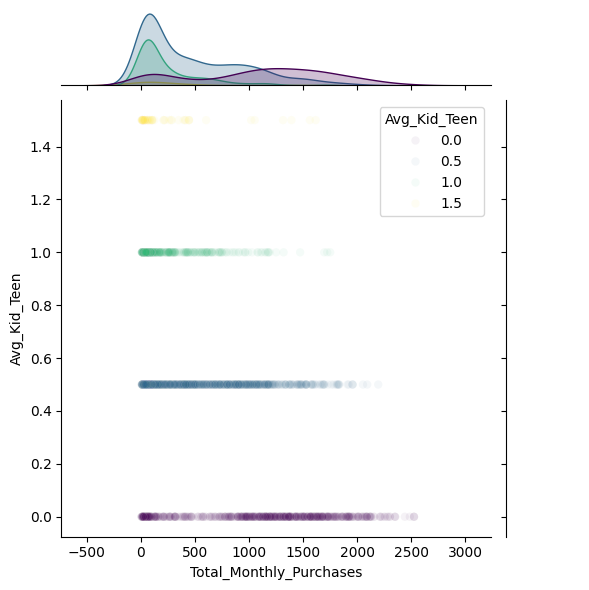

In [ ]:
# Graph 3 -
cs_df_v03 = cs_df.copy()

# Feature engineering - We create new feature to measure customers average monthly purchases of wines, fruits, meatm fish, sweets and gold
cs_df_v03['Total_Monthly_Purchases'] = cs_df_v03[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
# Feature engineering - We create new feature to measure customers average kid/teen number, in order to see if it has any realationship with their average monthly purchases
cs_df_v03['Avg_Kid_Teen'] = cs_df_v03[['Kidhome', 'Teenhome']].mean(axis=1)


plt.figure(figsize=(12, 8))
sns.jointplot(x='Total_Monthly_Purchases', y='Avg_Kid_Teen', data=cs_df_v03, hue='Avg_Kid_Teen', kind='scatter', palette='viridis', alpha=0.05)
plt.show()

**Insight** - After creating new columns, namely `Average_Kid_Teen` to assess the average number of kids and teens a person has, and `Total_Monthly_Purchases` to quantify overall spending on items like fruit and meat, our aim was to explore any potential relationship between these two variables.

Our findings indicate that individuals with more kids or teens at home tend to make higher purchases. This aligns with the expected pattern of increased spending when there are more mouths to feed. Conversely, households with fewer or no kids/teens appear to exhibit lower spending habits.

## 2. KMEANS (35 points)

In this exercise, you will implement K-means clustering on a comprehensive customer dataset, to identify distinct customer segments.

*   Load the data again.
*   Scale the data using minmax scaler (2 points).
*   Encode categorical variables (3 points).
*   Apply k-Means algorithm on the 'MntMeatProducts' and 'MntWines' features using n_clusters=5
 (10 points).
*   Visualize the clusters (5 points).
*   Apply k-Means algorithm on all features and find the best k using 2 methods (10 points).
*   Visualize the methods (5 points).










In [ ]:
cs_df = pd.read_csv('customer_segmentation.csv')
cs_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Data Cleaning ###

Before we apply the K-means algorithm, we want to verify there isn't any row in our dataset that include null value. If ther are such, we'll drop them in order to avoid any issues with executing our model and model preformance.

In [ ]:
# Check for null values in the entire cs_df data frame
null_values = cs_df.isnull().sum()

# Print the results
columns_with_null = null_values[null_values > 0]
if not columns_with_null.empty:
    PRINT(f"Columns with null values:\n{columns_with_null}")
else:
    PRINT(f"No null values found in any column.")


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Columns with null values:
Income    24
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


As we can see, we got 24 rows that contain 'Nan' values in the income column

In [ ]:
rows_with_nulls = cs_df[cs_df.isnull().any(axis=1)]

# Print few rows with null values
PRINT(f"Rows with null values:{rows_with_nulls[:5]}")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows with null values:      ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10  1994        1983  Graduation        Married     NaN        1         0   
27  5255        1986  Graduation         Single     NaN        1         0   
43  7281        1959         PhD         Single     NaN        0         0   
48  7244        1951  Graduation         Single     NaN        2         1   
58  8557        1982  Graduation         Single     NaN        1         0   

   Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
10  15-11-2013       11         5  ...                  7             0   
27  20-02-2013       19         5  ...                  1             0   
43  05-11-2013       80        81  ...                  2             0   
48  01-01-2014       96        48  ...                  6             0   
58  17-06-2013       57        11  ...               

In [ ]:
cs_df = cs_df.dropna()

PRINT(f'Filtered the null rows from cs_df data frame')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Filtered the null rows from cs_df data frame
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [ ]:
cs_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


###  Scale the Data using Minmax Scaler and Encode Categorical Variables ###

In order to scale the dataset, we will:

* Drop the ID column
* Scale the categirical column using `LabelEncoder` so that all of the data will hold numeric values.
* Scale the *whole* data using `MinMaxScaler`

In [ ]:
cs_df.drop(['ID'], axis=1, inplace=True)

#### Scale the Categorical Columns Using LabelEndocer ####

In [ ]:
categorical_columns = ['Education', 'Marital_Status' ,'Dt_Customer']

# Generate LabelEncoder instance
label_encoder = LabelEncoder()

for col in categorical_columns:
    cs_df[col] = label_encoder.fit_transform(cs_df[col])

PRINT(f'Finished scaling the categorical columns')
cs_df.head(2)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Finished scaling the categorical columns
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,2,4,58138.0,0,0,80,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,2,4,46344.0,1,1,157,38,11,1,...,5,0,0,0,0,0,0,3,11,0


#### Scale the Whole Data Using MixMax ####

In [ ]:
# Generate MinMaxScaler instance
scaler = MinMaxScaler()

cs_df_scaled = scaler.fit_transform(cs_df)

# Convert the scaled array back to a DataFrame
cs_df_scaled = pd.DataFrame(cs_df_scaled, columns=cs_df.columns)

cs_df = cs_df_scaled.copy()

PRINT(f'Done scalling the whole data using MinMax')
cs_df.head(2)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Done scalling the whole data using MinMax
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0.621359,0.5,0.571429,0.084832,0.0,0.0,0.121029,0.585859,0.425318,0.442211,...,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.592233,0.5,0.571429,0.067095,0.5,0.5,0.237519,0.383838,0.007368,0.005025,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Apply k-Means Algorithm on the 'MntMeatProducts' and 'MntWines' Features using n_clusters=5 & Visualize ###

In [ ]:
def apply_kmeans_algorithm_and_visualize(df, n_clusters) -> None:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto',init='k-means++',max_iter=300,
                        tol=0.0001, algorithm='elkan')
    df['Cluster'] = kmeans.fit_predict(df)


    # Visualize the clusters
    plt.figure(figsize=(10, 6))

    for cluster in range(n_clusters):
        cluster_data = df[df['Cluster'] == cluster]
        plt.scatter(cluster_data['MntWines'], cluster_data['MntMeatProducts'], label=f'Cluster {cluster + 1}')

    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='X', color='red', label='Centroids')
    plt.title('k-Means Clustering of MntWines vs MntMeatProducts')
    plt.xlabel('MntWines')
    plt.ylabel('MntMeatProducts')
    plt.legend()
    plt.show()

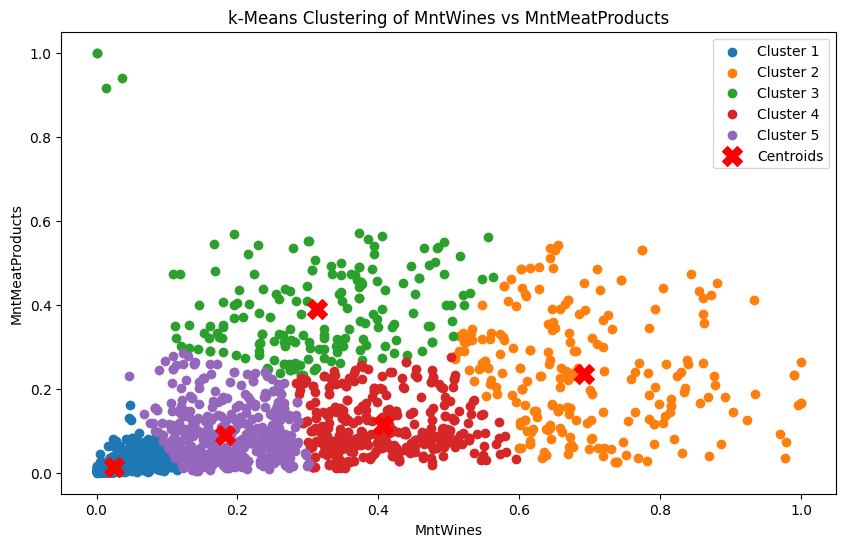

In [ ]:
cs_df_kmeans_01 = cs_df[['MntWines', 'MntMeatProducts']]
apply_kmeans_algorithm_and_visualize(df=cs_df_kmeans_01, n_clusters=5)

### Apply k-Means Algorithm on all Features and Find the Best K using 2 Methods  ###

### Elbow

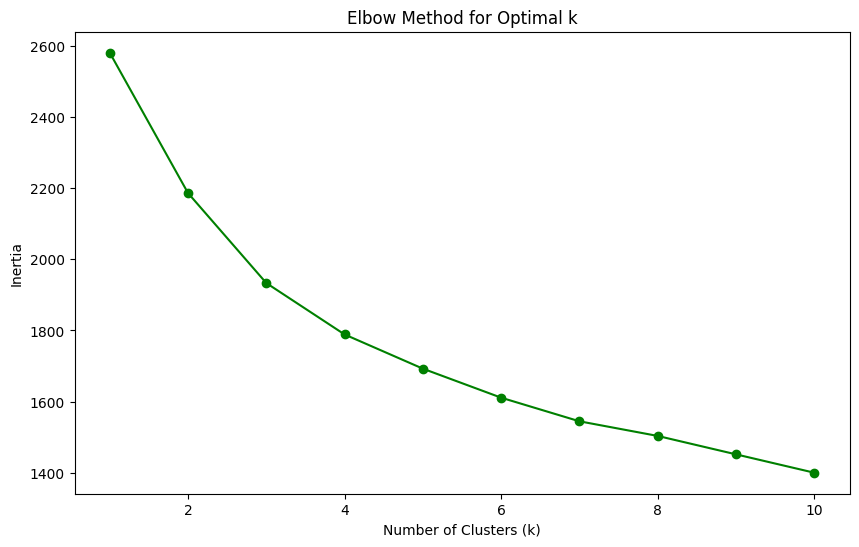

In [ ]:
elbow_method_for_best_K_and_visualize(df=cs_df)

### Silhouette Score

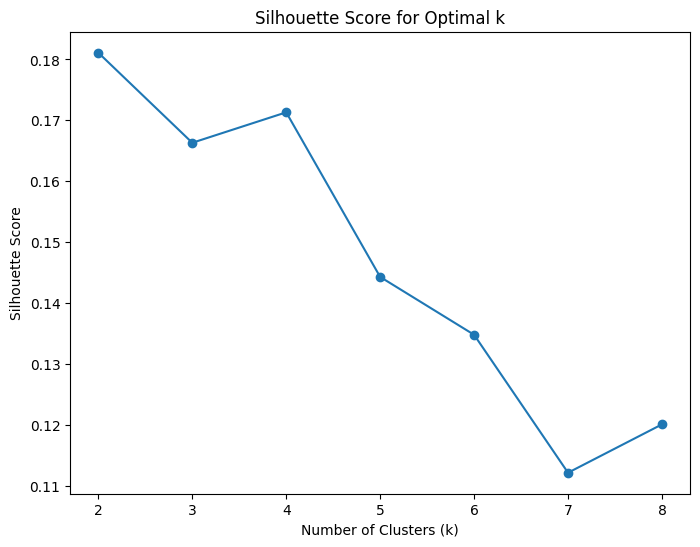

In [ ]:
silhouette_score_method_for_best_K_and_visualize(df=cs_df)

## 3. PCA (15 points)
In this exercise, you will implement PCA:
*   With n_components = 2 (5 points).
*   Visualize the PCA (5 points).
*   Find the variance explined in this PCA (5 points).


In [ ]:
cs_df.head(2)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0.621359,0.5,0.571429,0.084832,0.0,0.0,0.121029,0.585859,0.425318,0.442211,...,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.592233,0.5,0.571429,0.067095,0.5,0.5,0.237519,0.383838,0.007368,0.005025,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


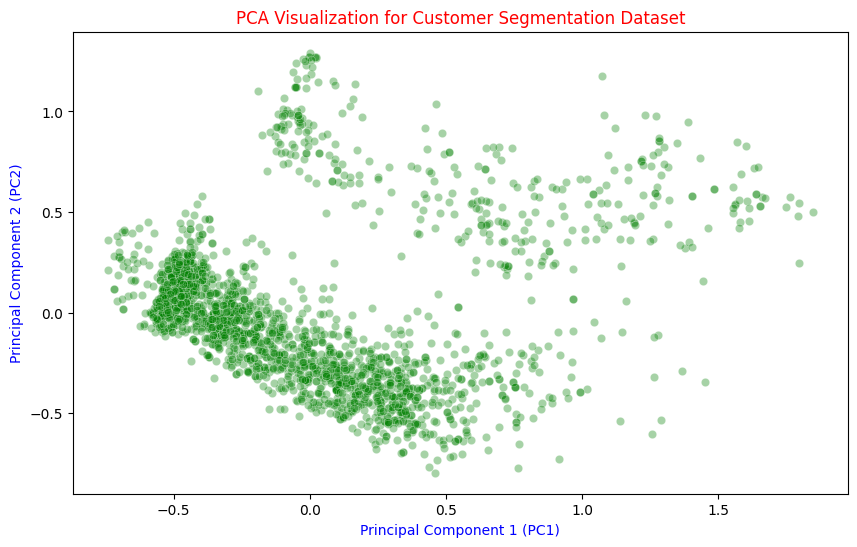

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Explained Variance Ratio (PCA1, PCA2): (0.248, 0.143)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [ ]:
# Create a PCA instance with n_components=2
pca = PCA(n_components=2)

# Fit and transform the data
pca_result = pca.fit_transform(cs_df)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Visualize the PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, color='green', alpha=0.35)
plt.title('PCA Visualization for Customer Segmentation Dataset', color='red')
plt.xlabel('Principal Component 1 (PC1)', color='blue')
plt.ylabel('Principal Component 2 (PC2)', color='blue')
plt.show()

# Find the variance explained by each principal component
explained_variance_ratio = pca.explained_variance_

PRINT(f"Explained Variance Ratio (PCA1, PCA2): ({explained_variance_ratio[0]:.3f}, {explained_variance_ratio[1]:.3f})")

**Q**: What is the variance explained in the 2 component PCA?

**A**:
The first principal component (PCA1) explains approximately 25% of the total data variance, and the second principal component (PCA2) explains about 14.4% of the total variance. Together, these two principal components explain a cumulative variance of 25% + 14.4% = 39.4% of the total variance in the data.

The results indicates that while reducing the dimensionality of our data from 29 columns into just 2 columns, we stil got pretty good variance which indicates a richer representation of the original data, facilitating better understanding and analysis of the underlying structures and patterns.

## 4. PCA & Kmeans (20 points)
This time, we will use the PCA data for the kmeans model.
*   Run PCA with n_components = 2 (5 points)
*   Find the best k for kmeans (5 points)
*   Plot the best clusters (5 points)
*   Answer the question (5 points)





We dont execute PCA with `n_components = 2` again on our dataset, as mentioned in the FORUM that we can use the answer of the last question, which is identical.

In [ ]:
cs_df_after_pca = pca_df

pca_df.head(3)

,PC1,PC2
0,0.753649,0.308824
1,-0.535344,0.113771
2,0.235303,-0.306548


### Find the Best K-Means ###

#### Elbow

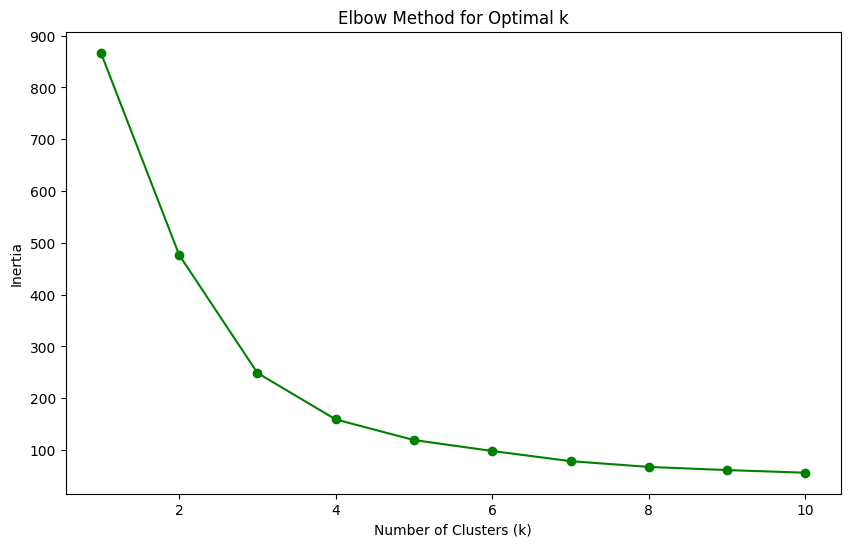

In [ ]:
elbow_method_for_best_K_and_visualize(df=pca_df)

#### Silhouette

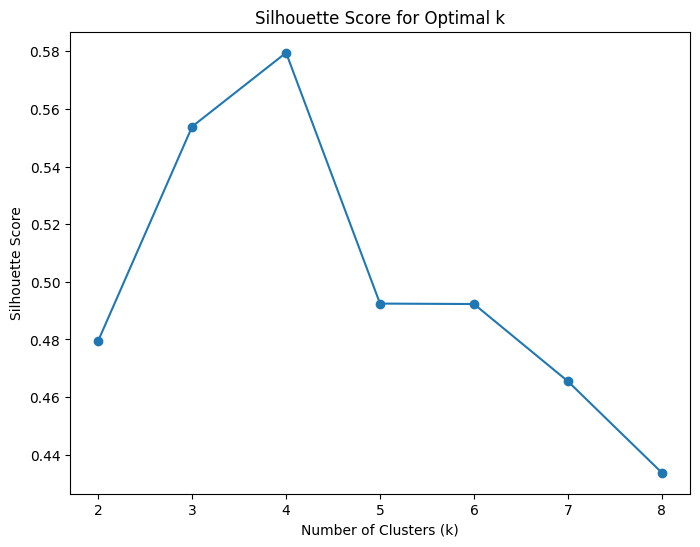

In [ ]:
silhouette_score_method_for_best_K_and_visualize(df=pca_df)

### Plot the best clusters ###

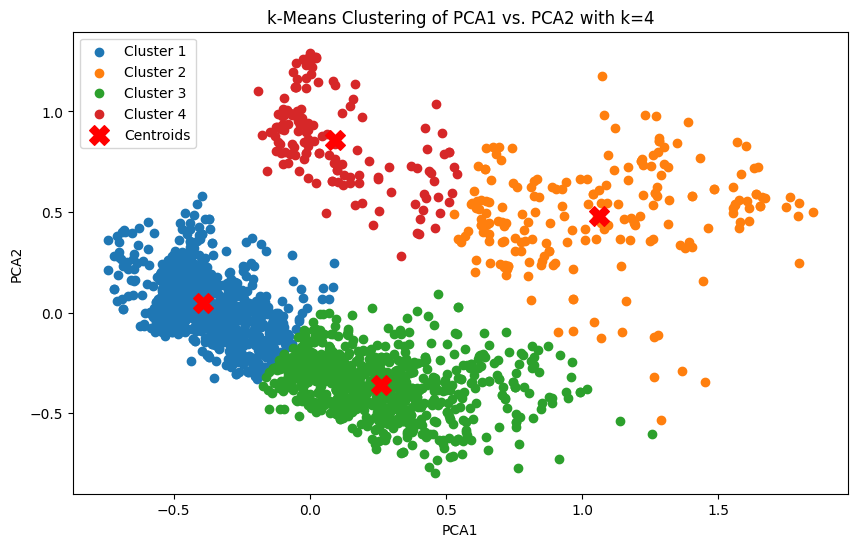

In [ ]:
apply_kmeans_algorithm_and_visualize_PCA(df=pca_df, n_clusters=4)

**Q**: In our human eye, it's looks like we need 5 clusters. But both methods return 2. Why do you think kmeans returning 2 and not 5?

**A**: We got 4 clusters, not 5 clusters.

According to what we have been told in the lectures and tirgul & lab, K-means assumes spherical and equally sized clusters, is sensitive to scaling and initial centroid positions, and might not capture non-globular cluster shapes well. Therefore, the idea that with k=2 k-means my catch more spherical clusters than with 4, and that we scaled the data and also maybe choose the centroid position in such case that it prefer k=2 over k=4, we got higher silhouette score with k=4 than k=2. Nevertheless, by the elbow method we can see that only after k=4 the changes in the inertia is not significant and by visualizing the clusters, it's much more clear that k=4 is what we need and no k=2.

## 5. K-means Clustering Exercise (15 points)
Manually divide a given set of points into clusters using the K-means clustering.

You are given the following two-dimensional points: <br>
*   A:(2,2)
*   B:(2,6)
*   C:(3,7)
*   D:(5,5)
*   E:(6,2)
*   F:(7,4)
*   G:(8,7)

**Tasks:**
1.   **Visualize the Data**: Plot these points and label each point for easy identification (3 points).
2.   **Choose Initial Cluster Centers**: Arbitrarily select three points as initial cluster centers (For example, you might choose points A and D) and **Answer the questions** (12 points).












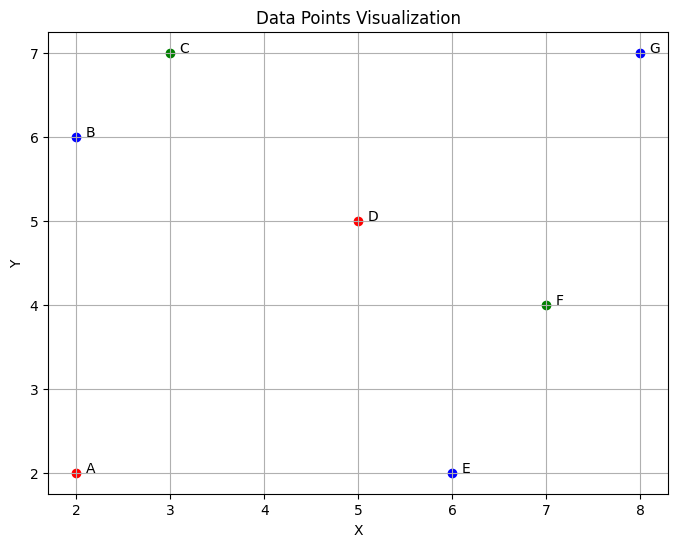

In [ ]:
points = {'A': (2, 2), 'B': (2, 6), 'C': (3, 7), 'D': (5, 5), 'E': (6, 2), 'F': (7, 4), 'G': (8, 7)}
colors = {'A': 'red', 'B': 'blue', 'C': 'green', 'D': 'red', 'E': 'blue', 'F': 'green', 'G': 'blue'}

# Plotting the points with assigned colors
plt.figure(figsize=(8, 6))
for label, coords in points.items():
    plt.scatter(*coords, color=colors[label])

# Labeling the points according to their correct key in the points dictionary
for label, coords in points.items():
    plt.text(coords[0] + 0.1, coords[1], label)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Points Visualization')
plt.grid(True)
plt.show()

In [ ]:
chosen_initial_centers_dict = {'Cluster 1': points['A'], 'Cluster 2': points['C'], 'Cluster 3': points['G']}

PRINT("Initial Cluster Centroids:")
for cluster, center in chosen_initial_centers_dict.items():
    PRINT(f"{cluster}: {center}")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Initial Cluster Centroids:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Cluster 1: (2, 2)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Cluster 2: (3, 7)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Cluster 3: (8, 7)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


**Questions**:
1.   How did the points group together in the final iteration?
2.   Was choosing different initial cluster centers leading to different final clusters? Why might this happen?
3.   Think of any real-world scenarios where K-means clustering could be useful?






**Answers**:
1. In the last final interation, the points assigned to thier corresponding group (e.g., cluster) such as every point is closest to their centroid than to every other cluster centroid, and then the centroid move once again by the formula learned in the lecture&tirgul such as the clusters stop change, and every point assigned to their correct cluster.

2. Yes, as we saw in the tirgul, choosing different staring point for some cluster, can lead to different final results in the clusters after executing K-means algorithm. This phenomena can happen because K-means try to minimize the distance between each point to their cluster centroid by the formula given in the clas. Therfore, different staring points (centroids) can lead to different clusters.

3.  K-means algorithm can be useful in filed like health care, where k-means algorithms can be used to detect ubnormal pattern in the human body that can lead to discovery of tumors etc. Moreover, K-means can be useful in fields such as marketing, sales, internet websites and more where it can be used to identify patterns in customers preferences and their activities, that can lead to changes that can provide profits for companies and industries while enhancing customers experience.

## 6. Bonus - Compute projection (5 points)
**Notice:** No code required in this section.

Given the next PCA projection matrix
$\begin{pmatrix}
1 & 1\\
2 & -1
\end{pmatrix}$
And the correspoding egienvalues
$(5, -1)$

Compute the projection to one dimension of the next two vectors:
\begin{pmatrix}
1 & 3
\end{pmatrix}
\begin{pmatrix}
3 & 7
\end{pmatrix}

or the vector $\begin{pmatrix}1 & 3\end{pmatrix}$ we calculate its projection to one dimension by multiplying it with the first column in the pca projaction matrix.

So for $\begin{pmatrix} 1& 3\end{pmatrix}$ we do $\begin{pmatrix}1 & 3\end{pmatrix}$ * $\begin{pmatrix}1\\ 2 \end{pmatrix}$ which is 7.

And for $\begin{pmatrix}3 & 7\end{pmatrix}$ we do $\begin{pmatrix}3 & 7\end{pmatrix}$ * $\begin{pmatrix}1\\ 2 \end{pmatrix}$ which is 17.